In [19]:
%load_ext autoreload
%autoreload 2

import models.dataset as ds
import glob
import matplotlib.pyplot as plt

dataset_path = './Data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Training Data Size: 7839


/tmp/ipykernel_481500/1713381652.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,num_show,idx+1)


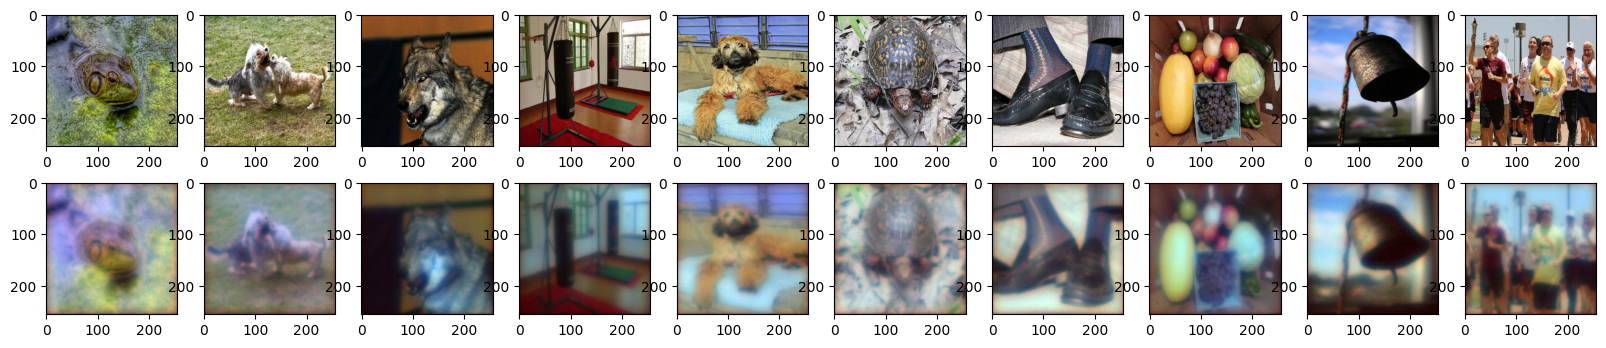

In [29]:
dataset_dict = dict()
for ds_type in ['train','val','test']:
    dataset_dict[ds_type] = dict()
    dataset_dict[ds_type]['path'] = dataset_path + ds_type + '/'
    filepath_all_gt = glob.glob(dataset_dict[ds_type]['path']+'/groundtruth/*')
    filepath_all_blur = glob.glob(dataset_dict[ds_type]['path']+'/input/*')
    dataset_dict[ds_type]['dataloader'] = ds.NanoDataset(filepath_all_gt,filepath_all_blur)

print('Training Data Size:',len(dataset_dict['train']['dataloader']))

num_show = 10
plt.figure(figsize=(2*num_show,4))
plt.axis('off')
for idx in range(num_show):
    plt.subplot(2,num_show,idx+1)
    image = dataset_dict['train']['dataloader'][idx]['gt']
    plt.imshow(image)
    plt.subplot(2,num_show,idx+1+num_show)
    image = dataset_dict['train']['dataloader'][idx]['blur']
    plt.imshow(image)